In [ ]:
""""
Number classification using simple linear neural network
takes a 28 by 24 image of handwriten numbers and classifies
them. numbers range from 0-9
"""

In [1]:
import torch, torchvision
from torchvision import transforms, datasets

In [2]:
# download and perform transformation on data
train = datasets.MNIST(
    "", 
    train=True, 
    download=True, 
    transform=transforms.Compose([transforms.ToTensor()])
)
test = datasets.MNIST(
    "", 
    train=False, 
    download=True, 
    transform=transforms.Compose([transforms.ToTensor()])
)


In [3]:
# load the data 
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
x, y = data[0][0], data[1][0]

In [7]:
print(y)

tensor(4)


In [8]:
import matplotlib.pyplot as plt

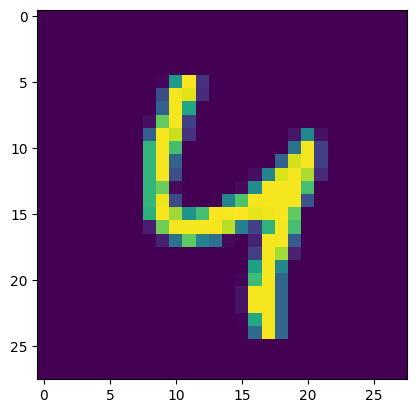

In [9]:
plt.imshow(data[0][0].view(28,28))

In [10]:
counter = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

In [14]:
for data in trainset:
    Xs, Ys = data
    for y in Ys:
        counter_dict[int(y)] += 1
        counter += 1

In [12]:
counter_dict

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [16]:
for i in counter_dict:
    print(f"{i}: {(counter_dict[i]/counter)*100}")

0: 19.743333333333332
1: 22.475
2: 19.86
3: 20.436666666666667
4: 19.473333333333333
5: 18.07
6: 19.726666666666667
7: 20.883333333333333
8: 19.503333333333334
9: 19.830000000000002


In [10]:
import torch.nn as nn
import torch.nn.functional as F

In [14]:
# initialize the add layers

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
    

In [15]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [16]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.1576, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0068, grad_fn=<NllLossBackward0>)


In [19]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        print(y)
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", correct/total)

tensor([0, 0, 2, 4, 7, 5, 1, 3, 7, 3])
tensor([9, 7, 6, 7, 1, 3, 2, 1, 3, 9])
tensor([0, 4, 5, 2, 0, 3, 8, 1, 2, 1])
tensor([7, 5, 1, 1, 3, 8, 8, 6, 2, 8])
tensor([1, 7, 5, 3, 0, 5, 8, 0, 1, 6])
tensor([0, 8, 4, 4, 7, 7, 7, 3, 2, 9])
tensor([6, 1, 3, 3, 3, 8, 9, 1, 9, 5])
tensor([2, 2, 8, 9, 0, 9, 3, 6, 7, 1])
tensor([8, 9, 8, 7, 6, 6, 8, 6, 3, 0])
tensor([5, 9, 6, 6, 9, 1, 1, 8, 8, 1])
tensor([3, 6, 4, 6, 0, 1, 6, 6, 4, 2])
tensor([7, 8, 0, 9, 7, 2, 7, 2, 8, 1])
tensor([4, 7, 4, 5, 7, 1, 7, 4, 5, 0])
tensor([7, 3, 1, 6, 5, 9, 0, 2, 2, 5])
tensor([2, 6, 6, 0, 7, 2, 0, 4, 4, 5])
tensor([5, 6, 7, 7, 0, 9, 0, 5, 4, 2])
tensor([8, 5, 2, 0, 1, 0, 5, 9, 1, 6])
tensor([6, 8, 5, 7, 0, 9, 5, 3, 8, 4])
tensor([6, 8, 0, 8, 7, 9, 7, 3, 3, 2])
tensor([9, 7, 3, 8, 5, 2, 0, 2, 6, 2])
tensor([0, 4, 1, 6, 2, 0, 8, 9, 3, 3])
tensor([6, 8, 5, 5, 1, 5, 1, 2, 5, 7])
tensor([4, 2, 8, 5, 3, 1, 9, 8, 8, 7])
tensor([1, 3, 4, 6, 7, 5, 9, 5, 6, 2])
tensor([7, 2, 8, 0, 3, 2, 3, 6, 8, 6])
tensor([6, 8, 8, 0, 5, 1,

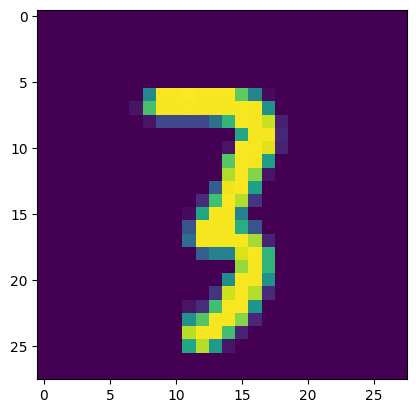

In [24]:
plt.imshow(X[3].view(28,28))
plt.show()

In [25]:
print(
    torch.argmax(
        net(X[3].view(-1, 28*28))[0]
    )
)

tensor(3)
